# A basic neural network
*Author: Marie Peeters*

Github: https://github.com/mariezz/visualize-nn-learning

## Experiment 1A: introduction
In this notebook, we will program a very basic neural network. We will experiment with different target functions, the learning rate, the number of hidden neurons, the number of iterations, and the randomness of the generated datasets and initial weights.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from basic_neural_network_help_functions import f1, f2
from basic_neural_network_help_functions import get_train_set, get_test_set, get_new_random_dataset
from basic_neural_network_help_functions import get_initial_weights, get_new_random_weights
from basic_neural_network_help_functions import sigmoid

Choose which function the neural network will try to estimate:

In [2]:
f = f1  # f1 or f2

Now, we load the training dataset and the test dataset. The following lines will give the same randomly generated datasets each time, which ensures that the execution is deterministic and the results are reproducible.

In [3]:
X_train, Y_train = get_train_set(f)  # 1000 datapoints
X_test, Y_test = get_test_set(f)  # 100 datapoints

If you want to test the performance of the neural network on another random dataset, you can uncomment the following lines to generate a new random dataset. The function `get_new_random_dataset` takes 2 arguments, `f` and `N`, and returns `N` random numbers (in the interval [-5;5]) and their image by `f`.

In [4]:
# X_train, Y_train = get_new_random_dataset(f, 1000)  # the second argument is the number of training datapoints you want
# X_test, Y_test = get_new_random_dataset(f, 100)

Now, we visualize the dataset:

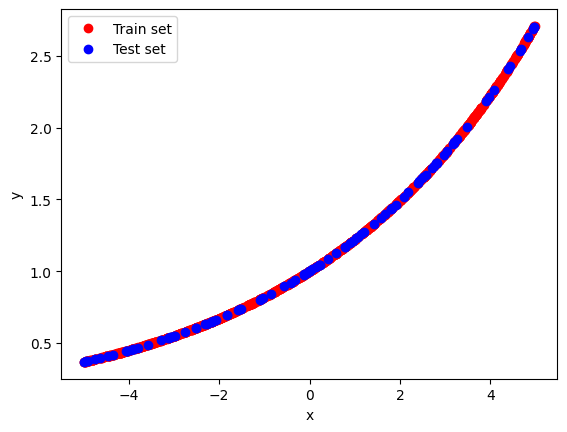

In [5]:
# Plot the dataset:
plt.plot(X_train, Y_train, "ro", label="Train set")
plt.plot(X_test, Y_test, "bo", label="Test set")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Choose the number of hidden neurons and initialize the neural network:

In [6]:
# Number of hidden neurons:
h = 3  # E.g. 2, 3, 5, 8, ...

# Initialize the input and hidden layers:
X = np.ones(2)
H = np.ones(h)

# Initialize the weights to small random numbers:
U, V = get_initial_weights(h)  # U has size (h-1)x2 and V has size 1xh

As with the dataset, you can uncomment the following lines to create new random initial weights:

In [7]:
# U, V = get_new_random_weights(h)

Define functions to compute the network's output, compute the gradient of the loss with respect to U and with respect to V, and compute the error that the network makes on the train and test sets:

In [8]:
# Compute the network's output for 1 datapoint
def forward_pass(x):
    X[0] = x  # And X[1]=1
    H[:h-1] = sigmoid( U @ X )  # And H[h-1]=1
    O = V @ H
    return O[0]

# Compute the gradient of the loss on 1 datapoint
def back_propagate(e):  # e=o-y is the error (while the loss is half of the square of e)
    grad_V = e * H
    grad_U = np.zeros(U.shape)
    for i in range(h-1):
        grad_U[i,:] = e * V[0,i] * H[i] * (1 - H[i]) * X
    return (grad_V, grad_U)

# Compute the loss on a given dataset:
def compute_loss(x_values, y_values):
    loss = 0
    for j in range(len(x_values)):
        error = forward_pass(x_values[j]) - y_values[j]
        loss += error*error/2
    loss /= len(x_values)  # divide the loss by the size of the dataset
    return loss

# Compute the loss on the test set:
def compute_test_loss():
    return compute_loss(X_test, Y_test)

# Compute the loss on the training set:
def compute_train_loss():
    return compute_loss(X_train, Y_train)

Learning loop: choose the learning rate and the number of epochs, then train the neural network:

In [9]:
learning_rate = 1  # 1, 0.1, 0.05
epochs = 1000  # 100, 1000, 10000 ...

# Keep track of the evolution of the error and of the parameters (so we can plot them later):
E_test = [None for i in range(epochs+1)]
E_test[0] = compute_test_loss()
E_train = [None for i in range(epochs+1)]
E_train[0] = compute_train_loss()
evolution_V = np.zeros((1, h, epochs+1))
evolution_V[:,:,0] = V
evolution_U = np.zeros((h-1, 2, epochs+1))
evolution_U[:,:,0] = U
evolution_grad_V = np.zeros((1,h,epochs))
evolution_grad_U = np.zeros((h-1,2,epochs))

for i in range(epochs):
    # Estimate the gradient using the full dataset:
    grad_V = np.zeros(V.shape)
    grad_U = np.zeros(U.shape)
    for j in range(len(X_train)):
        o = forward_pass(X_train[j])
        e = o-Y_train[j]
        gradients = back_propagate(e)
        grad_V += gradients[0]
        grad_U += gradients[1]
        
    # Update the weights:
    V -= learning_rate * grad_V / len(X_train)
    U -= learning_rate * grad_U / len(X_train)

    # Store the error on the test and train sets, the weights, and the gradients (for later analysis):
    E_test[i+1] = compute_test_loss()
    E_train[i+1] = compute_train_loss()
    evolution_V[:,:,i+1] = V
    evolution_U[:,:,i+1] = U
    evolution_grad_V[:,:,i] = grad_V / len(X_train)
    evolution_grad_U[:,:,i] = grad_U / len(X_train)

Visualize the evolution of the performance:

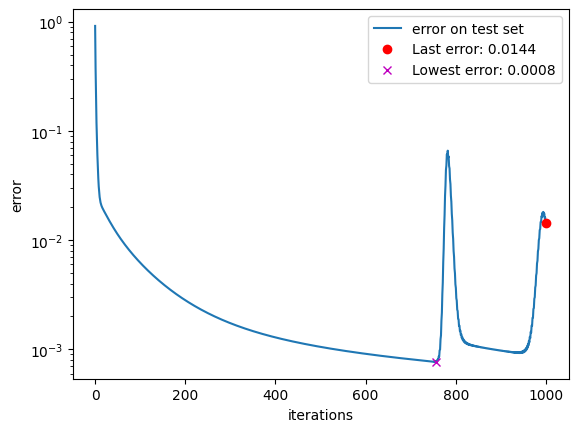

In [10]:
# Plot the evolution of the error on the test set:
plt.semilogy(E_test, label="error on test set")  # use plt.plot or plt.semilogy ("semilogy": plot with linear x-axis and logarithmic y-axis)
# plt.semilogy(E_train, label="error on train set")  # uncomment this if you want to also plot the error on the training set
plt.plot([epochs], [E_test[-1]], "ro", label=f"Last error: {'{:.4f}'.format(E_test[-1])}")
plt.plot([np.argmin(E_test)], [min(E_test)], "mx", label=f"Lowest error: {'{:.4f}'.format(min(E_test))}")
plt.xlabel("iterations")
plt.ylabel("error")
plt.legend()
plt.show()

Visualize what the network has learned:

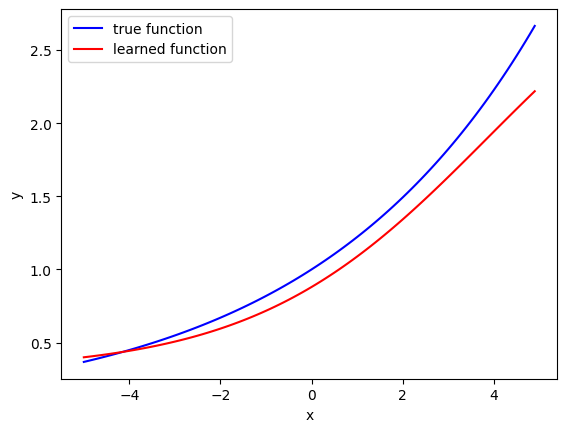

In [11]:
# Plot the learned function:
plt.plot(np.arange(-5., 5., 0.1), [f(x) for x in np.arange(-5., 5., 0.1)], "b", label="true function")
plt.plot(np.arange(-5., 5., 0.1), [forward_pass(x) for x in np.arange(-5., 5., 0.1)], "r", label="learned function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Plot the evolution of some of the weights in the output layer (we plot the last weights in V instead of the first weights because we want to see how the weight corresponding to the hidden bias unit differs from the other weights):

In [12]:
# First argument is the number of weights you want to plot.
# Second and third arguments say which range of iterations should be plotted:
# (first_iter, last_iter)=(0,epochs+1) means that we plot all iterations
# You can choose a smaller range (e.g. (750,810)) if you want to have a closer look at what happened during those iterations.
def plot_evolution_V(nb_plots, first_iter, last_iter):
    # Plot the weights V[h-1], V[h-2], ..., V[h-nb_plots]
    for i in range(nb_plots):
        plt.plot(evolution_V[0,h-1-i,first_iter:last_iter], label=f"V[{h-1-i}]")  # plot the evolution of V[h-1-i]
    plt.xlabel("iterations")
    plt.ylabel("V")
    plt.legend()
    plt.show()

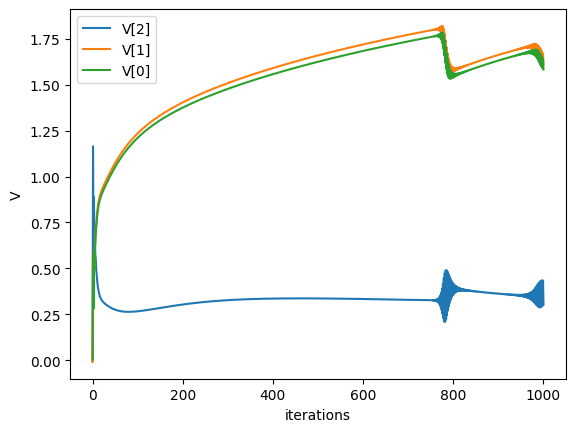

In [13]:
nb_weights_to_plot = 5  # Number of weights you want to plot
(first_iter, last_iter) = 0, epochs+1  # Default: use '0, epochs+1' to plot everything (and make sure the values you choose are within bounds)

plot_evolution_V( min(h,nb_weights_to_plot), first_iter, last_iter)  # There are no more than h weights in the output layer

Plot the evolution of some of the weights in the hidden layer:

In [14]:
# First argument is a list of (i,j) pairs that says which elements of U should be plotted
def plot_evolution_U(index_list, first_iter, last_iter):
    for (i,j) in index_list:
        if i>=h-1 or j>=2: continue  # skip if the indexes are out of bounds
        plt.plot(evolution_U[i,j,first_iter:last_iter], label=f"U[{i},{j}]")  # plot the evolution of Uij
    plt.xlabel("iterations")
    plt.ylabel("U")
    plt.legend()
    plt.show()

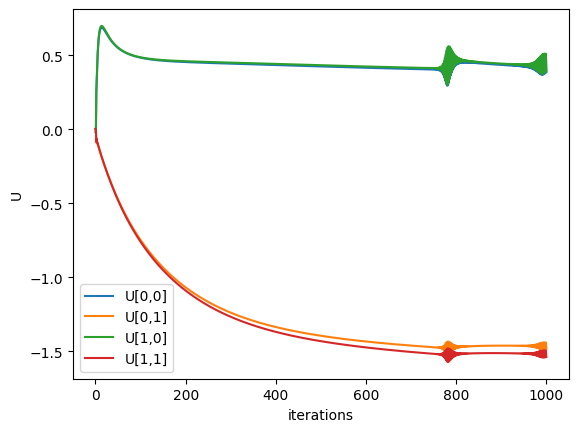

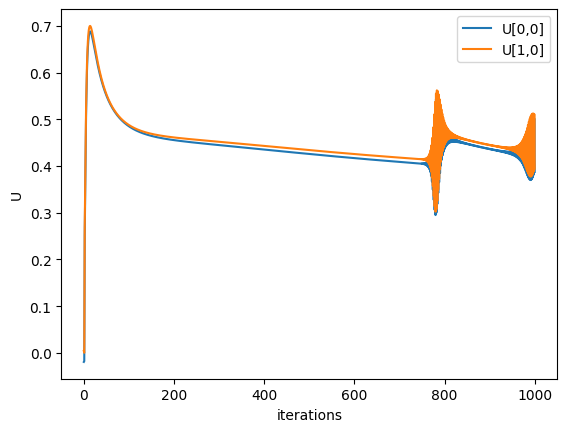

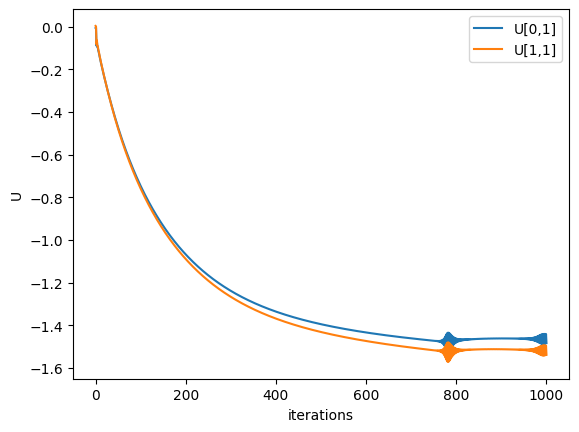

In [15]:
plot_evolution_U([(0,0), (0,1), (1,0), (1,1)], first_iter, last_iter)  # use this one if h=3
plot_evolution_U([(0,0), (1,0), (2,0), (3,0),], first_iter, last_iter)  # use these two if h is 5 or bigger
plot_evolution_U([(0,1), (1,1), (2,1), (3,1),], first_iter, last_iter)

## Experiment 1B: a deeper look
We will now further examine the unexpected oscillations witnessed in the first part of the notebook.
Restart the notebook and run it with `(f, h, learning_rate, epochs) = (f1, 3, 1, 1000)` or with `(f, h, learning_rate, epochs) = (f2, 8, 0.1, 1200)`.

Compute the norm of the gradient at each iteration:

In [16]:
evolution_grad_norm = np.sqrt( np.sum(np.square(evolution_grad_V),axis=(0,1)) + np.sum(np.square(evolution_grad_U),axis=(0,1)) )

Compute the angles between consecutive gradients:

In [17]:
# Compute the cosine of the angles between consecutive gradients:
gradient_angles = np.zeros(epochs-1)
for i in range(epochs-1):
    dot_product = np.sum(np.multiply(evolution_grad_V[:,:,i], evolution_grad_V[:,:,i+1])) \
                + np.sum(np.multiply(evolution_grad_U[:,:,i], evolution_grad_U[:,:,i+1]))
    gradient_angles[i] = dot_product / (evolution_grad_norm[i] * evolution_grad_norm[i+1])
# Compute the angles (in radian):
gradient_angles = np.arccos(gradient_angles)

Compare the iterations with minimal gradient norm and minimal training error:

In [18]:
minima = [np.argmin(evolution_grad_norm), np.argmin(E_train), np.argmin(E_test)]
print(minima[0], minima[1], minima[2])

734 752 755


Plot the norm of the gradients and the angles between consecutive gradients and compare with the evolution of the error:

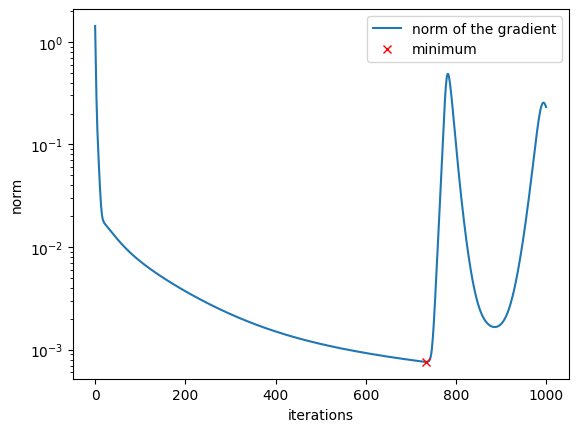

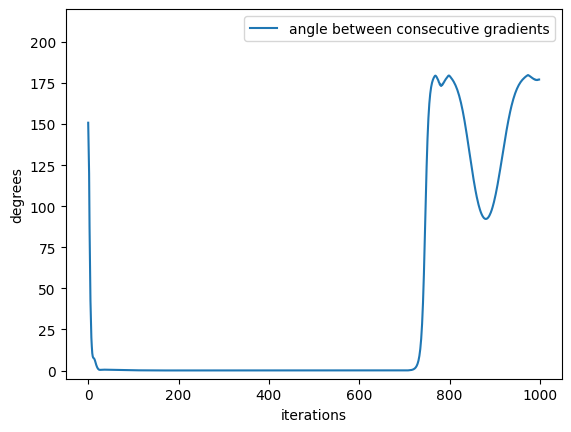

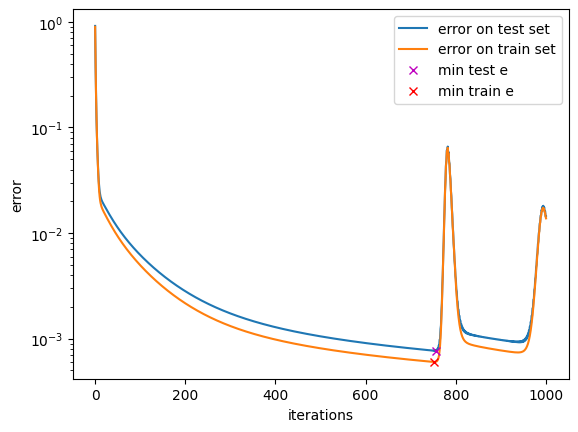

In [19]:
# NORM OF THE GRADIENT
plt.semilogy(evolution_grad_norm, label="norm of the gradient")
plt.semilogy([minima[0]], [min(evolution_grad_norm)], "rx", label="minimum")  # point with minimal gradient norm
plt.xlabel("iterations")
plt.ylabel("norm")
plt.legend()
plt.show()

# ANGLE (in degrees and not radians) BETWEEN CONSECUTIVE GRADIENTS
plt.ylim(-5, 220)
plt.plot(np.degrees(gradient_angles), label="angle between consecutive gradients")
plt.xlabel("iterations")
plt.ylabel("degrees")
plt.legend()
plt.show()

# EVOLUTION OF THE ERROR ON THE TEST AND TRAINING SETS
plt.semilogy(E_test, label="error on test set")
plt.semilogy(E_train, label="error on train set")
plt.plot([minima[2]], [min(E_test)], "mx", label=f"min test e")
plt.plot([minima[1]], [min(E_train)], "rx", label=f"min train e")
plt.xlabel("iterations")
plt.ylabel("error")
plt.legend()
plt.show()

Now we zoom on the interesting parts of the plots.

Try `(first_iter, last_iter)=(1000, 1025)` and `(first_iter, last_iter)=(1000, 1040)` if `(f, h, learning_rate, epochs)=(f2, 8, 0.1, 1200)`.

Try `(first_iter, last_iter)=(730, 760)` and `(first_iter, last_iter)=(750, 810)` if `(f, h, learning_rate, epochs)=(f1, 3, 1, 1000)`.

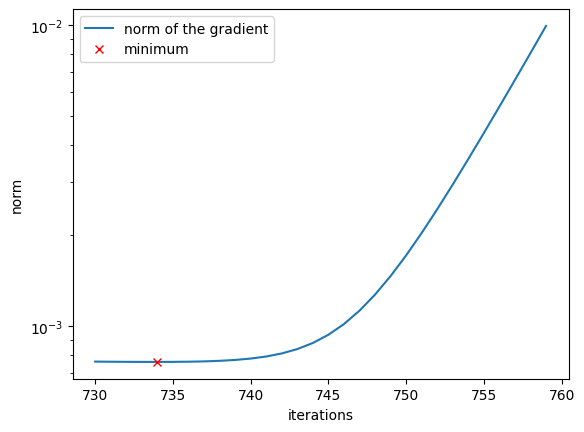

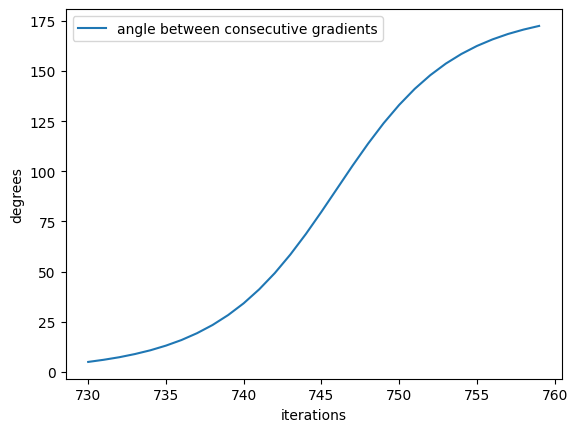

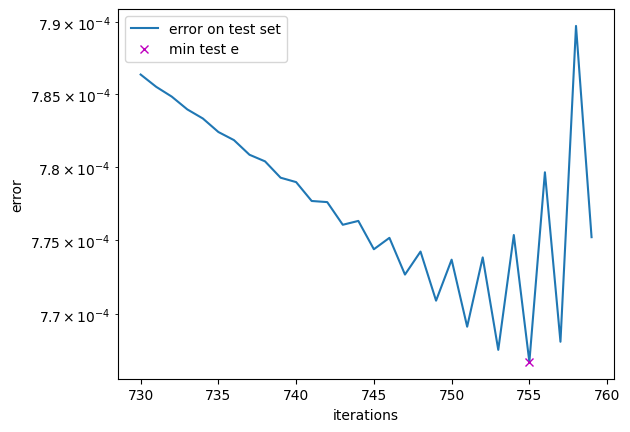

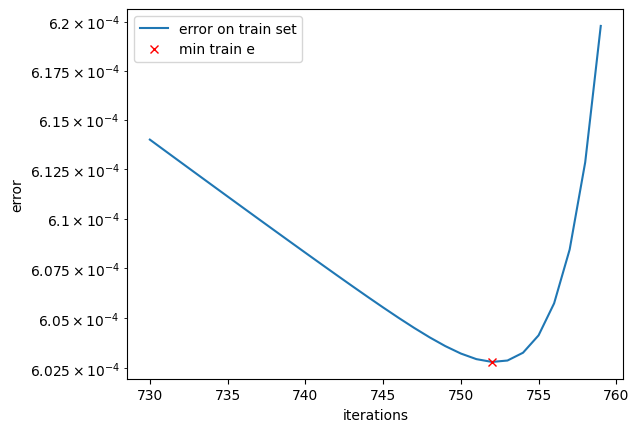

In [20]:
(first_iter, last_iter) = 730, 760  # choose range in [0,epochs-1] (gradient_angles contains only epochs-1 points)
# Make sure first_iter and last_iter are within bounds
first_iter = max(first_iter,0)
last_iter = min(last_iter,epochs-1)

plt.semilogy([i for i in range(first_iter, last_iter)], evolution_grad_norm[first_iter:last_iter], label="norm of the gradient")
if minima[0] >= first_iter and minima[0] < last_iter:
    plt.semilogy([minima[0]], [min(evolution_grad_norm)], "rx", label="minimum")
plt.xlabel("iterations")
plt.ylabel("norm")
plt.legend()
plt.show()

# first convert radians to degrees:
plt.plot([i for i in range(first_iter, last_iter)], np.degrees(gradient_angles[first_iter:last_iter]), label="angle between consecutive gradients")
plt.xlabel("iterations")
plt.ylabel("degrees")
plt.legend()
plt.show()

# ERROR ON TEST SET
plt.semilogy([i for i in range(first_iter, last_iter)], E_test[first_iter:last_iter], label="error on test set")
if minima[2] >= first_iter and minima[2] < last_iter:
    plt.plot([minima[2]], [min(E_test)], "mx", label=f"min test e")
plt.xlabel("iterations")
plt.ylabel("error")
plt.legend()
plt.show()

# ERROR ON TRAIN SET
plt.semilogy([i for i in range(first_iter, last_iter)], E_train[first_iter:last_iter], label="error on train set")
if minima[1] >= first_iter and minima[1] < last_iter:
    plt.plot([minima[1]], [min(E_train)], "rx", label=f"min train e")
plt.xlabel("iterations")
plt.ylabel("error")
plt.legend()
plt.show()


The following code produces a 2D plot that visualizes the gradients. The lengths of the arrows are determined by the norm of the gradient and the directions of the arrows are determined by the angles between consecutive gradients.

The first plot shows all arrows, so they are not well visible. The second plot zooms on the iterations specified by `(first_iter, last_iter)`.

The first plot contains 1 red dot for each hundred of iterations. The red crosses on the second plot indicate the points where the gradient's norm and the train error are minimal.

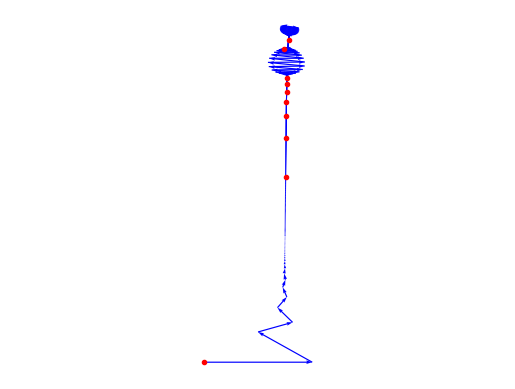

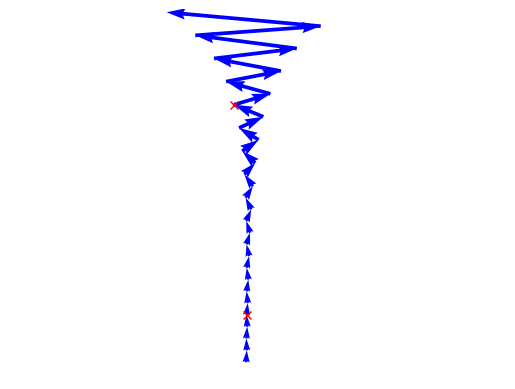

In [21]:
# A 2D VISUALIZATION OF THE GRADIENTS' NORMS AND ANGLES
absolute_angles_gradient = np.zeros(epochs)  # the directions of the arrows (angle with the x-axis), first arrow has angle 0 
for i in range(epochs-1):
    if i%2 == 0: absolute_angles_gradient[i+1] = absolute_angles_gradient[i] + gradient_angles[i]
    else: absolute_angles_gradient[i+1] = absolute_angles_gradient[i] - gradient_angles[i]
    
updates_2d = np.zeros((2,epochs))
for i in range(epochs):
    updates_2d[:,i] = [evolution_grad_norm[i]*np.cos(absolute_angles_gradient[i]), evolution_grad_norm[i]*np.sin(absolute_angles_gradient[i])]

points = np.zeros((2,epochs))  # don't compute the last point
for i in range(epochs-1):
    points[:,i+1] = points[:,i] + updates_2d[:,i]

plt.quiver(points[0,:], points[1,:], updates_2d[0,:], updates_2d[1,:], angles="xy", scale_units="xy", scale=1, color="b")
plt.plot(points[0,::100], points[1,::100], "r.")
plt.axis("off")
plt.axis("equal")
plt.show()

begin, end = first_iter, last_iter
plt.quiver(points[0,begin:end], points[1,begin:end], updates_2d[0,begin:end], updates_2d[1,begin:end], angles="xy", scale_units="xy", scale=1, color="b")

if minima[0] >= first_iter and minima[0] < last_iter:
    plt.plot([points[0,minima[0]]], [points[1,minima[0]]], "rx")  # point with minimal grad norm
if minima[1] >= first_iter and minima[1] < last_iter:
    plt.plot([points[0,minima[1]]], [points[1,minima[1]]], "rx")  # point with minimal train error
plt.axis("off")
plt.axis("equal")
plt.show()

Run the dynamic visualization code on your computer. This will animate the plots and allow you to zoom to have a better look at the plots.